In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#Inspeção Inicial

In [ ]:
df = pd.read_csv('/content/sample_data/Sleep_health_and_lifestyle_dataset.csv')

print(f"Dimensões: {df.shape}")
print("\n")
print(f"Colunas: {df.columns}")
print("\n")
display(df.head())
print("\n")
df.info()

Dimensões: (374, 13)


Colunas: Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')




,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


A coluna Sleep Disorder possui muitos valores nulos (apenas 155 não-nulos), o que provavelmente indica a ausência de distúrbio nesses pacientes e pode ser preenchido com None e a variável Blood Pressure está como texto, podendo ser dividida em duas colunas (sistólica e diastólica).

# Análise de Integridade (Missing Values e Tipos)

Valores Nulos
Sleep Disorder    219
dtype: int64




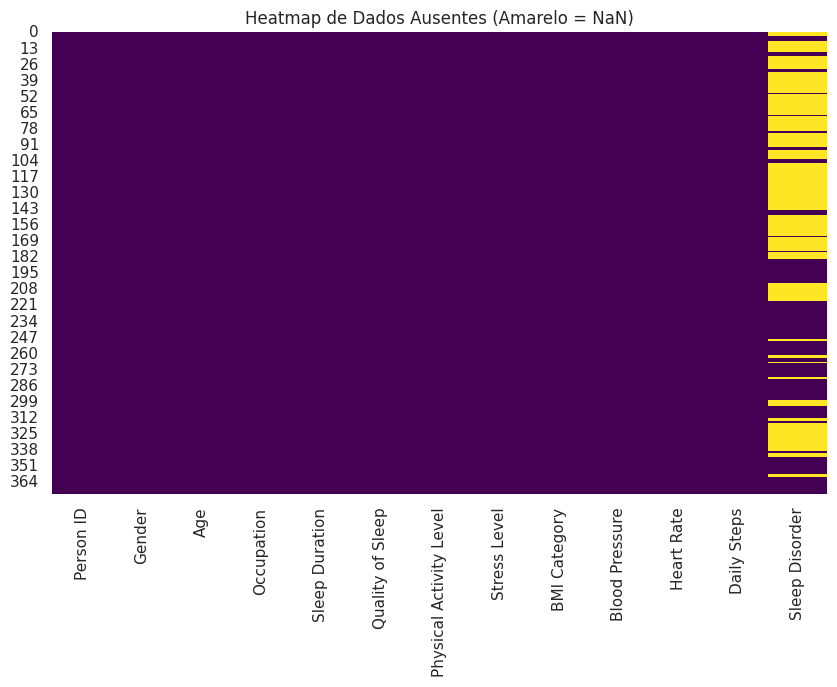



Valores Únicos em Colunas Categóricas/Texto
Gender: 2 valores únicos
Top exemplos: ['Male' 'Female']
Occupation: 11 valores únicos
Top exemplos: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse']
BMI Category: 4 valores únicos
Top exemplos: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure: 25 valores únicos
Top exemplos: ['126/83' '125/80' '140/90' '120/80' '132/87']
Sleep Disorder: 2 valores únicos
Top exemplos: [nan 'Sleep Apnea' 'Insomnia']


In [ ]:
# Verificação de valores nulos
print("Valores Nulos")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("\n")

# Visualização do heatmap dos dados faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap de Dados Ausentes (Amarelo = NaN)')
plt.show()
print("\n")

# Verificação de Cardinalidade (Valores únicos nas colunas de texto)
print("Valores Únicos em Colunas Categóricas/Texto")
cols_texto = df.select_dtypes(include='object').columns
for col in cols_texto:
    print(f"{col}: {df[col].nunique()} valores únicos")
    # Mostra os 10 mais frequentes paa ter ideia do conteúdo
    print(f"Top exemplos: {df[col].unique()[:5]}")

Como esperado, vemos apenas Sleep Disorder com missing values, mas também podemos perceber que a classe BMI apresenta as categorias "Normal" e "Normal Weight", que parecem uma inconsistência na padronização da classe.

# Estatísticas Descritivas (Numéricas e Categóricas)

In [ ]:
print("Estatísticas Numéricas")
display(df.describe().T)

print("\n Estatísticas Categóricas")
display(df.describe(include='object').T)

Estatísticas Numéricas


,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0



 Estatísticas Categóricas


,count,unique,top,freq
Gender,374,2,Male,189
Occupation,374,11,Nurse,73
BMI Category,374,4,Normal,195
Blood Pressure,374,25,130/85,99
Sleep Disorder,155,2,Sleep Apnea,78


A maioria da população é adulta com ~6.800 passos diários, majoritariamente com peso normal e equilíbrio entre gêneros. Nurse é a ocupação mais comum.
A pressão arterial vai precisar ser reorganizada no pré-processamento.

# Análise Univariada

### Variáveis Numéricas

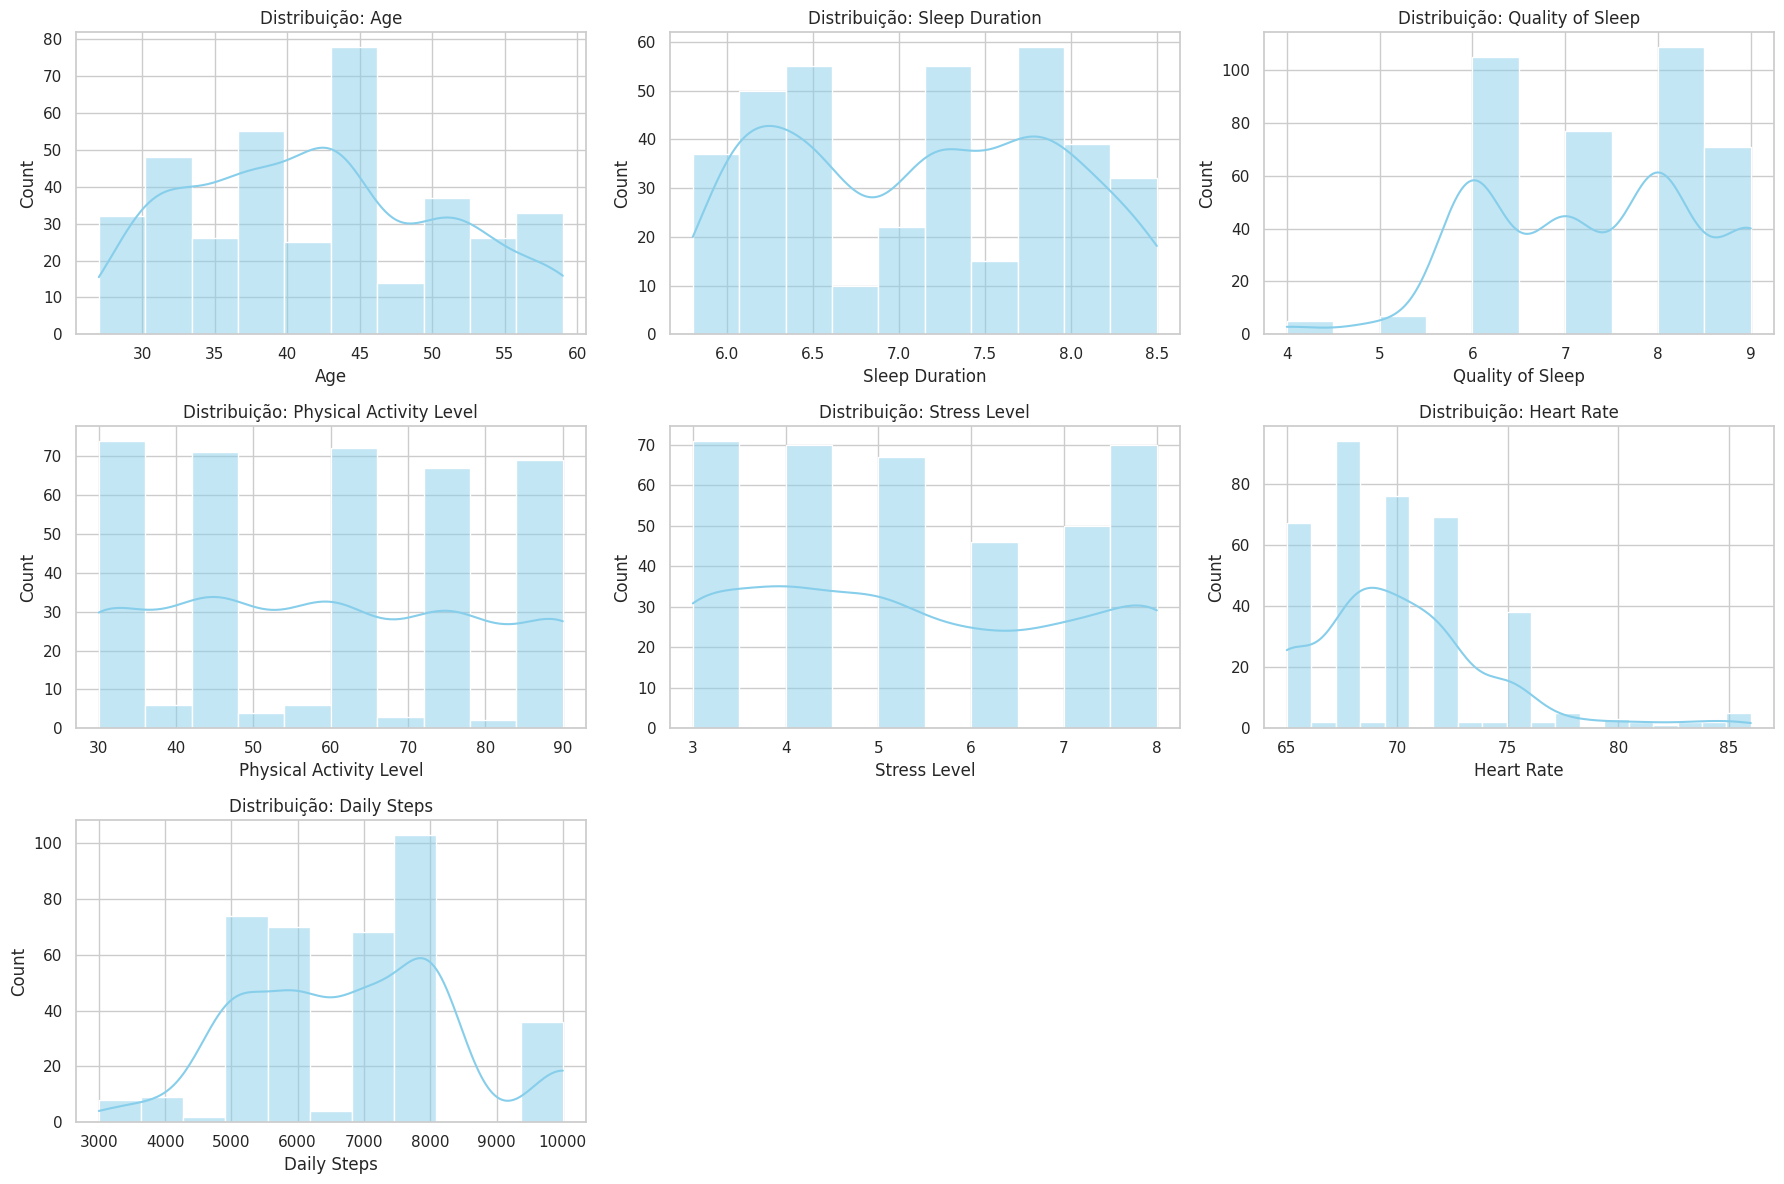

In [ ]:
# Seleciona apenas colunas numéricas puras
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove ID
if 'Person ID' in numerical_cols:
    numerical_cols.remove('Person ID')

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribuição: {col}')

# Remove eixos sobressalentes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
print('\n')

### Variáveis Categóricas

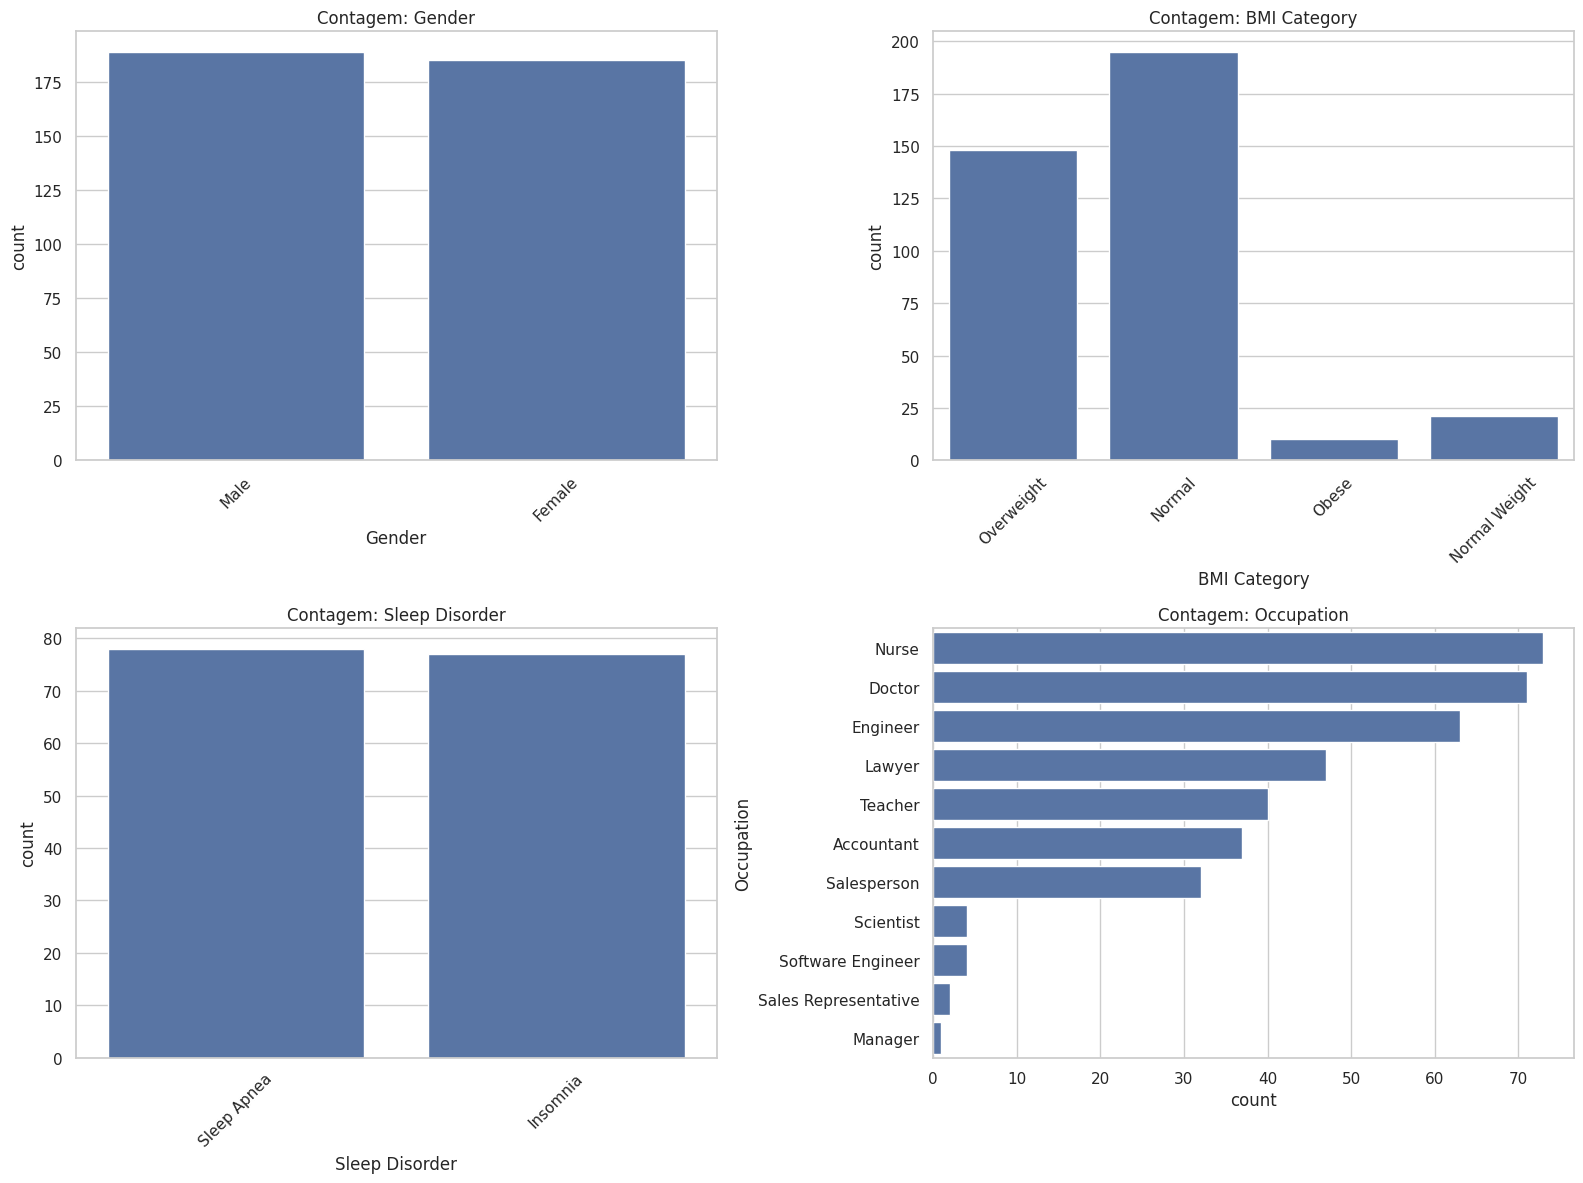


Gender


,Quantidade,Porcentagem (%)
Gender,,
Male,189,50.53
Female,185,49.47



BMI Category


,Quantidade,Porcentagem (%)
BMI Category,,
Normal,195,52.14
Overweight,148,39.57
Normal Weight,21,5.61
Obese,10,2.67



Sleep Disorder


,Quantidade,Porcentagem (%)
Sleep Disorder,,
NaN,219,58.56
Sleep Apnea,78,20.86
Insomnia,77,20.59



Occupation


,Quantidade,Porcentagem (%)
Occupation,,
Nurse,73,19.52
Doctor,71,18.98
Engineer,63,16.84
Lawyer,47,12.57
Teacher,40,10.70
Accountant,37,9.89
Salesperson,32,8.56
Scientist,4,1.07
Software Engineer,4,1.07


In [ ]:
# Escolhi as categóricas mais relevantes para contagem
# Nota: 'Blood Pressure' tem muitos valores únicos, então não plotei gráfico de barra dele
cat_cols_plot = ['Gender', 'BMI Category', 'Sleep Disorder', 'Occupation']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(cat_cols_plot):
    if col == 'Occupation':
        # Plotando horizontalmente por ter muitas profissões
        sns.countplot(data=df, y=col, ax=axes[i], order=df[col].value_counts().index)
    else:
        sns.countplot(data=df, x=col, ax=axes[i])

    axes[i].set_title(f'Contagem: {col}')
    if col != 'Occupation':
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

for col in cat_cols_plot:
    print(f"\n{col}")

    counts = df[col].value_counts(dropna=False)
    percentages = df[col].value_counts(dropna=False, normalize=True) * 100

    table = pd.concat([counts, percentages], axis=1)
    table.columns = ['Quantidade', 'Porcentagem (%)']

    display(table.round(2))

Como temos uma divisão desequilibrada das profissões, talvez seja interessante pensar na inputação de valores sintéticos depois para o treinamento do modelo e em técnicas de balanceamento das classes. Volto a chamar atenção pra inconsitência de "Normal" e "Normal Weight".

# Análise Bivariada

/tmp/ipython-input-66407246.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Occupation', y='Quality of Sleep', order=order_prof, palette='coolwarm')


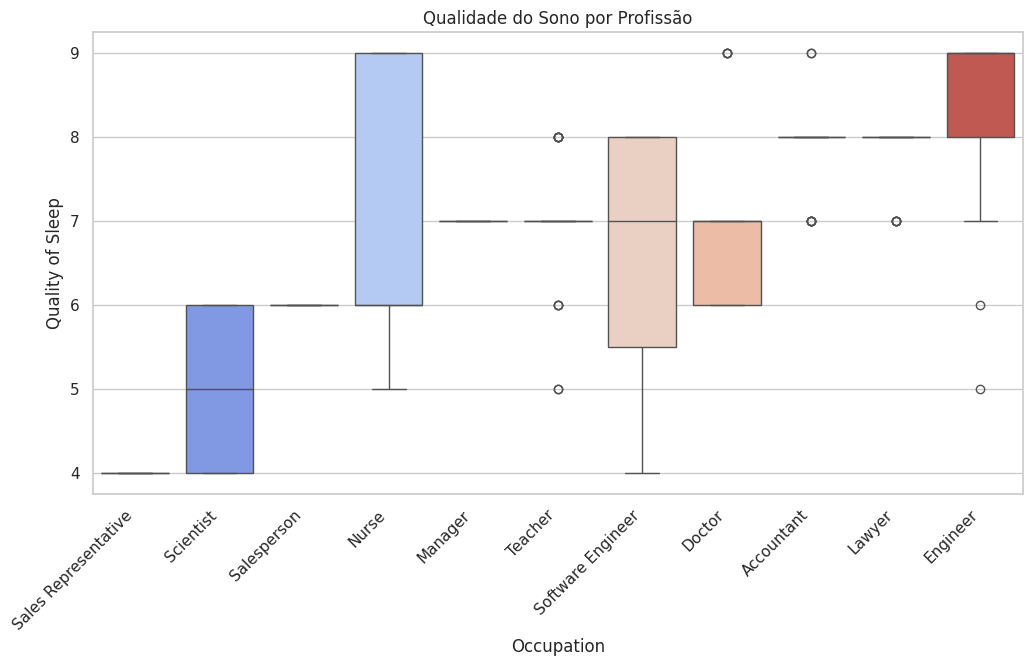

/tmp/ipython-input-66407246.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BMI Category', y='Daily Steps', palette='Set2')


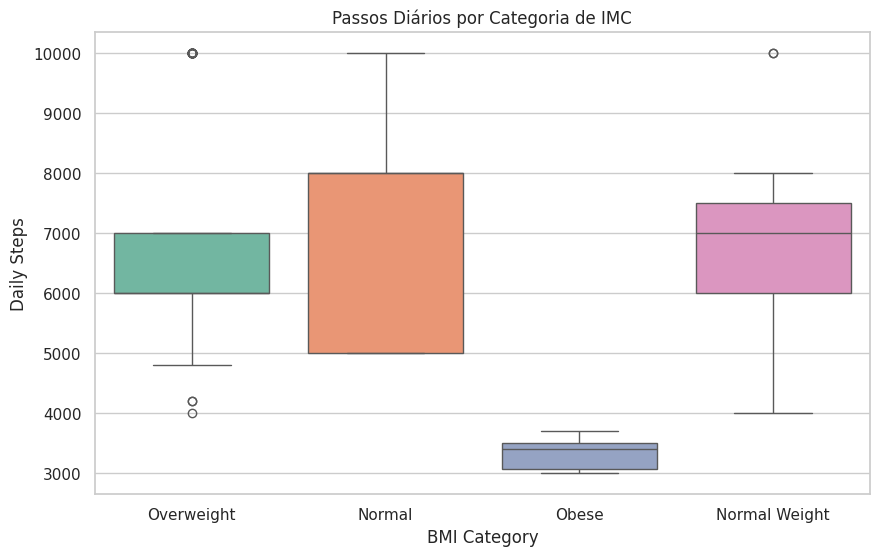

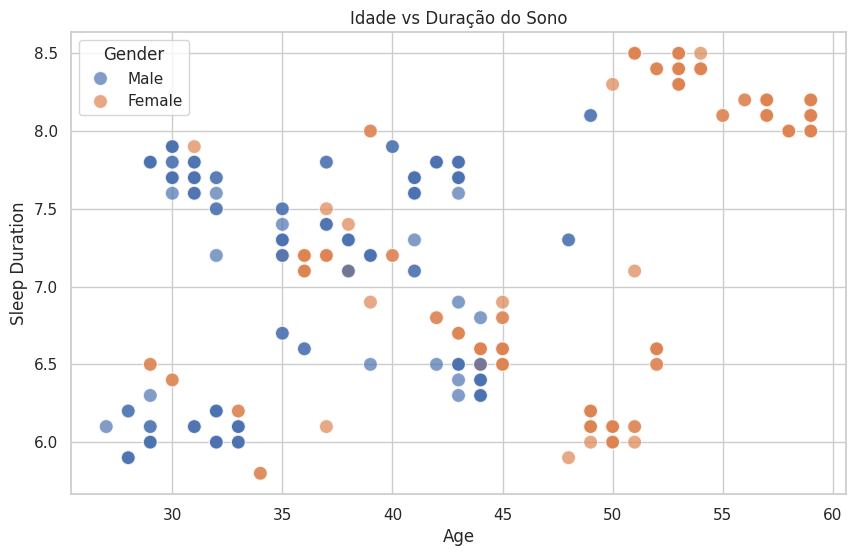

In [ ]:
# Qualidade do Sono vs Profissão
plt.figure(figsize=(12, 6))
# Ordenando pelo nível mediano de qualidade de sono
order_prof = df.groupby('Occupation')['Quality of Sleep'].median().sort_values().index
sns.boxplot(data=df, x='Occupation', y='Quality of Sleep', order=order_prof, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Qualidade do Sono por Profissão')
plt.show()
print('\n')

# Passos Diários vs Categoria BMI
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BMI Category', y='Daily Steps', palette='Set2')
plt.title('Passos Diários por Categoria de IMC')
plt.show()
print('\n')

# Scatterplot: Idade vs Duração do Sono
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Sleep Duration', hue='Gender', alpha=0.7, s=100)
plt.title('Idade vs Duração do Sono')
plt.show()

# Matriz de Correlação (Apenas Numéricos)

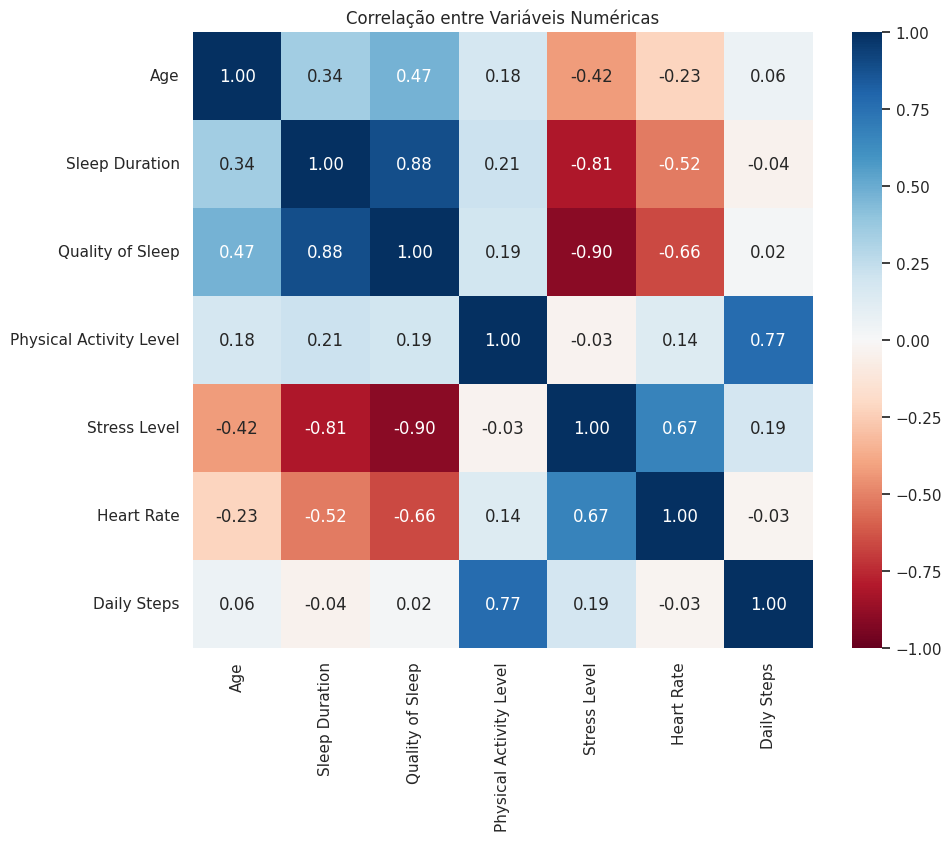

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
if 'Person ID' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['Person ID'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

O Stress Level apresenta uma correlação negativa fortíssima tanto com a Quality of Sleep quanto com a Sleep Duration, sendo como o principal "inimigo" do sono. temos também uma maior associação entre Heart Rate e estresse e entre Daily Steps e Physical Activity Level. A atividade física, surpreendentemente, apresenta baixa correlação direta com a qualidade do sono.

Lembrando que:
Valores Positivos: Quando uma variável aumenta, a outra também tende a aumentar.
Valores Negativos: Quando uma variável aumenta, a outra tende a diminuir.

# Insights Iniciais

In [ ]:
print("Insights Iniciais")

# Média de sono por gênero
print("\nMédia de Duração do Sono por Gênero:")
print(df.groupby('Gender')['Sleep Duration'].mean())

# Top 5 profissões com menor média de sono
print("\nTop 5 Profissões com MENOR média de sono:")
print(df.groupby('Occupation')['Sleep Duration'].mean().sort_values().head(5))

# Relação de Sleep Disorder com a média de estresse
print("\nMédia de Estresse por Distúrbio do Sono")
print(df.groupby('Sleep Disorder')['Stress Level'].mean())

Insights Iniciais

Média de Duração do Sono por Gênero:
Gender
Female    7.229730
Male      7.036508
Name: Sleep Duration, dtype: float64

Top 5 Profissões com MENOR média de sono:
Occupation
Sales Representative    5.900000
Scientist               6.000000
Salesperson             6.403125
Teacher                 6.690000
Software Engineer       6.750000
Name: Sleep Duration, dtype: float64

Média de Estresse por Distúrbio do Sono
Sleep Disorder
Insomnia       5.870130
Sleep Apnea    5.666667
Name: Stress Level, dtype: float64


As mulheres apresentam uma leve vantagem na duração do sono. No recorte profissional, apareceram ocupações com poucos dados representativos, então vou desconsiderar esse ranking. Indivíduos com Insônia reportam níveis médios de estresse ligeiramente superiores aos que sofrem de Apneia do Sono.